# Прогнозирование спроса на товар

* Выбор группвы товаров на основе которых будет
делаться прогноз
* Построение математической модели
* Построение прогноза спроса на товар в 
зависимости от региона, дат, и цены
* Корректировка прогноза товаров

# Расчет эластичности спроса на примере

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
cnt = [i for i in range(0,110, 10)]
price = sorted([i for i in range(1, 11)], reverse=True)

In [20]:
df = pd.DataFrame(zip(cnt, price), columns=['cnt', 'price'])

In [21]:
df

,cnt,price
0,0,10
1,10,9
2,20,8
3,30,7
4,40,6
5,50,5
6,60,4
7,70,3
8,80,2
9,90,1


In [22]:
df['prev_price'] = df.price.shift()
df['prev_cnt'] = df.cnt.shift()

In [23]:
df

,cnt,price,prev_price,prev_cnt
0,0,10,NaN,NaN
1,10,9,10.0,0.0
2,20,8,9.0,10.0
3,30,7,8.0,20.0
4,40,6,7.0,30.0
5,50,5,6.0,40.0
6,60,4,5.0,50.0
7,70,3,4.0,60.0
8,80,2,3.0,70.0
9,90,1,2.0,80.0


In [24]:
df['elasticity_coef'] = None
df.loc[~df.prev_price.isnull(), 'elasticity_coef'] = np.abs(((df.prev_price+df.price)*(df.cnt-df.prev_cnt))
                                                            /((df.cnt+df.prev_cnt)*(df.price-df.prev_price)))

In [25]:
df

,cnt,price,prev_price,prev_cnt,elasticity_coef
0,0,10,NaN,NaN,None
1,10,9,10.0,0.0,19.0
2,20,8,9.0,10.0,5.666667
3,30,7,8.0,20.0,3.0
4,40,6,7.0,30.0,1.857143
5,50,5,6.0,40.0,1.222222
6,60,4,5.0,50.0,0.818182
7,70,3,4.0,60.0,0.538462
8,80,2,3.0,70.0,0.333333
9,90,1,2.0,80.0,0.176471


<Axes: xlabel='cnt', ylabel='price'>

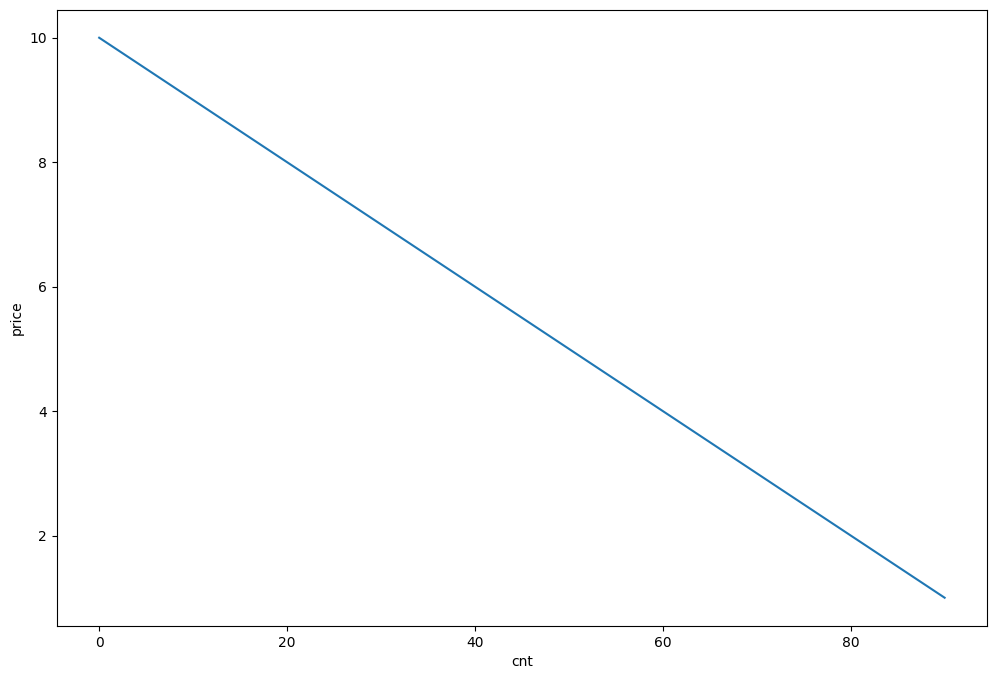

In [26]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=df['cnt'], y=df['price'])

# План разработки приложения для ценообразования

1) Выбрать товары для отдельного ценообразования
2) Для данных товаров построить модели предсказания спроса в зависимости от цены
3) Согласно выбранной стратегии компании выбрать, что именно мы будем оптимизировать
4) Корректировка цен отностельно ограничений и цен конкурентов
5) Получение обратной связи на изменение спроса в зависимости от цены и возврат к пункту 2